# Plot global distribution of errors for optimal localization

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import seaborn as sns
import xskillscore as xs
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
from scipy import stats

import cmocean as cmo
from cartopy.util import add_cyclic_point

In [2]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda/'
plot_dir = proj_dir + '/plots/paper/'
my_data_dir = proj_dir + '/my_data/20151206.030000/'
nb_dir = proj_dir + '/notebooks/'

In [3]:
raisin_black = [45/256, 42/256, 50/256]
heliotrope_gray = [162/256, 155/256, 171/256]
pacific_blue = [37/256, 162/256, 192/256]
deep_saffron = [255/256, 145/256, 51/256]

In [4]:
ens_size = 80
ds = xr.open_dataset(my_data_dir+'/opt_loc_global_Ne'+str(ens_size)+'.nc')
plot_prefix = 'Ne'+str(ens_size)+'_'
plot_title_end = ', Ens Size = '+str(ens_size)

In [5]:
mask = ds['error_true_K_atm_sst'].values.flatten()==0
lr_atm_ast = ds['locrad_gcr_atm_ast'].values.flatten()
lr_atm_sst = ds['locrad_gcr_atm_sst'].values.flatten()
lr_ocn_ast = ds['locrad_gcr_ocn_ast'].values.flatten()
lr_ocn_sst = ds['locrad_gcr_ocn_sst'].values.flatten()

In [6]:
print(np.median(lr_atm_ast[~mask]))
print(np.median(lr_atm_sst[~mask]))
print(np.median(lr_ocn_ast[~mask]))
print(np.median(lr_ocn_sst[~mask]))

0.8115682
0.102142006
30.512096
126.79799


In [7]:
keys = list(ds.data_vars)

In [8]:
for ii in (0,4,10,12):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[14]] 

error_unloc_atm_ast
error_gcr_atm_ast
error_gcra_atm_ast
error_eorl_atm_ast


In [9]:
for ii in (1, 5, 11, 13):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[15]] 

error_unloc_ocn_ast
error_gcr_ocn_ast
error_gcra_ocn_ast
error_eorl_ocn_ast


In [10]:
for ii in (16,20,26,28):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[30]] 

error_unloc_atm_sst
error_gcr_atm_sst
error_gcra_atm_sst
error_eorl_atm_sst


In [11]:
for ii in (17,21,27,29):
    print(keys[ii])
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[31]] 

error_unloc_ocn_sst
error_gcr_ocn_sst
error_gcra_ocn_sst
error_eorl_ocn_sst


In [12]:
keys2 = list(ds.data_vars)
keys2 = keys2[32:]

In [13]:
mask = ds['error_unloc_ocn_sst'] == 0

In [14]:
keys2

['error_unloc_atm_ast_relative',
 'error_gcr_atm_ast_relative',
 'error_gcra_atm_ast_relative',
 'error_eorl_atm_ast_relative',
 'error_unloc_ocn_ast_relative',
 'error_gcr_ocn_ast_relative',
 'error_gcra_ocn_ast_relative',
 'error_eorl_ocn_ast_relative',
 'error_unloc_atm_sst_relative',
 'error_gcr_atm_sst_relative',
 'error_gcra_atm_sst_relative',
 'error_eorl_atm_sst_relative',
 'error_unloc_ocn_sst_relative',
 'error_gcr_ocn_sst_relative',
 'error_gcra_ocn_sst_relative',
 'error_eorl_ocn_sst_relative']

In [15]:
loc_errs_ast_atm   = 100*np.array([ds[keys2[1]].where(~mask).values.flatten(),ds[keys2[2]].where(~mask).values.flatten(),ds[keys2[3]].where(~mask).values.flatten()])
loc_errs_ast_ocn   = 100*np.array([ds[keys2[5]].where(~mask).values.flatten(),ds[keys2[6]].where(~mask).values.flatten(),ds[keys2[7]].where(~mask).values.flatten()])
loc_errs_sst_atm   = 100*np.array([ds[keys2[9]].where(~mask).values.flatten(),ds[keys2[10]].where(~mask).values.flatten(),ds[keys2[11]].where(~mask).values.flatten()])
loc_errs_sst_ocn   = 100*np.array([ds[keys2[13]].where(~mask).values.flatten(),ds[keys2[14]].where(~mask).values.flatten(),ds[keys2[15]].where(~mask).values.flatten()])

In [16]:
loc_errs_ast_atm[0,:][loc_errs_ast_atm[0,:]<np.nanpercentile(loc_errs_ast_atm[0,:], 0.5)] = np.nan
loc_errs_ast_atm[0,:][loc_errs_ast_atm[0,:]>np.nanpercentile(loc_errs_ast_atm[0,:], 99.5)] = np.nan
loc_errs_ast_ocn[0,:][loc_errs_ast_ocn[0,:]<np.nanpercentile(loc_errs_ast_ocn[0,:], 0.5)] = np.nan
loc_errs_ast_ocn[0,:][loc_errs_ast_ocn[0,:]>np.nanpercentile(loc_errs_ast_ocn[0,:], 99.5)] = np.nan
loc_errs_sst_atm[0,:][loc_errs_sst_atm[0,:]<np.nanpercentile(loc_errs_sst_atm[0,:], 0.5)] = np.nan
loc_errs_sst_atm[0,:][loc_errs_sst_atm[0,:]>np.nanpercentile(loc_errs_sst_atm[0,:], 99.5)] = np.nan
loc_errs_sst_ocn[0,:][loc_errs_sst_ocn[0,:]<np.nanpercentile(loc_errs_sst_ocn[0,:], 0.5)] = np.nan
loc_errs_sst_ocn[0,:][loc_errs_sst_ocn[0,:]>np.nanpercentile(loc_errs_sst_ocn[0,:], 99.5)] = np.nan

loc_errs_ast_atm[1,:][loc_errs_ast_atm[1,:]<np.nanpercentile(loc_errs_ast_atm[1,:], 0.5)] = np.nan
loc_errs_ast_atm[1,:][loc_errs_ast_atm[1,:]>np.nanpercentile(loc_errs_ast_atm[1,:], 99.5)] = np.nan
loc_errs_ast_ocn[1,:][loc_errs_ast_ocn[1,:]<np.nanpercentile(loc_errs_ast_ocn[1,:], 0.5)] = np.nan
loc_errs_ast_ocn[1,:][loc_errs_ast_ocn[1,:]>np.nanpercentile(loc_errs_ast_ocn[1,:], 99.5)] = np.nan
loc_errs_sst_atm[1,:][loc_errs_sst_atm[1,:]<np.nanpercentile(loc_errs_sst_atm[1,:], 0.5)] = np.nan
loc_errs_sst_atm[1,:][loc_errs_sst_atm[1,:]>np.nanpercentile(loc_errs_sst_atm[1,:], 99.5)] = np.nan
loc_errs_sst_ocn[1,:][loc_errs_sst_ocn[1,:]<np.nanpercentile(loc_errs_sst_ocn[1,:], 0.5)] = np.nan
loc_errs_sst_ocn[1,:][loc_errs_sst_ocn[1,:]>np.nanpercentile(loc_errs_sst_ocn[1,:], 99.5)] = np.nan

loc_errs_ast_atm[2,:][loc_errs_ast_atm[2,:]<np.nanpercentile(loc_errs_ast_atm[2,:], 0.5)] = np.nan
loc_errs_ast_atm[2,:][loc_errs_ast_atm[2,:]>np.nanpercentile(loc_errs_ast_atm[2,:], 99.5)] = np.nan
loc_errs_ast_ocn[2,:][loc_errs_ast_ocn[2,:]<np.nanpercentile(loc_errs_ast_ocn[2,:], 0.5)] = np.nan
loc_errs_ast_ocn[2,:][loc_errs_ast_ocn[2,:]>np.nanpercentile(loc_errs_ast_ocn[2,:], 99.5)] = np.nan
loc_errs_sst_atm[2,:][loc_errs_sst_atm[2,:]<np.nanpercentile(loc_errs_sst_atm[2,:], 0.5)] = np.nan
loc_errs_sst_atm[2,:][loc_errs_sst_atm[2,:]>np.nanpercentile(loc_errs_sst_atm[2,:], 99.5)] = np.nan
loc_errs_sst_ocn[2,:][loc_errs_sst_ocn[2,:]<np.nanpercentile(loc_errs_sst_ocn[2,:], 0.5)] = np.nan
loc_errs_sst_ocn[2,:][loc_errs_sst_ocn[2,:]>np.nanpercentile(loc_errs_sst_ocn[2,:], 99.5)] = np.nan

In [17]:
df_ast_atm = pd.DataFrame(loc_errs_ast_atm.T, columns =['GC', 'GC-Atten', 'EORL'] )
df_ast_ocn = pd.DataFrame(loc_errs_ast_ocn.T, columns =['GC', 'GC-Atten', 'EORL'] )
df_sst_atm = pd.DataFrame(loc_errs_sst_atm.T, columns =['GC', 'GC-Atten', 'EORL'] )
df_sst_ocn = pd.DataFrame(loc_errs_sst_ocn.T, columns =['GC', 'GC-Atten', 'EORL'] )

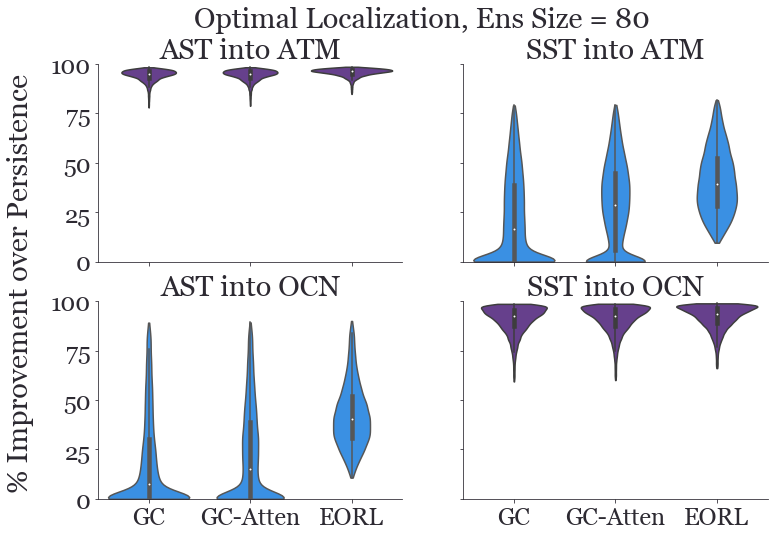

In [23]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True) 

# Violin Plots
bars = sns.violinplot(data=df_ast_atm, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[0,0], scale='area')
bars = sns.violinplot(data=df_ast_ocn, cut=0, alpha=0.8, color='dodgerblue',    ax=axs[1,0], scale='area')
bars = sns.violinplot(data=df_sst_atm, cut=0, alpha=0.8, color='dodgerblue',    ax=axs[0,1], scale='area')
bars = sns.violinplot(data=df_sst_ocn, cut=0, alpha=0.8, color='rebeccapurple', ax=axs[1,1], scale='area')

# Titles
fig.supylabel('% Improvement over Persistence', color=raisin_black)
fig.suptitle('Optimal Localization'+plot_title_end, color=raisin_black)
axs[0,0].set_title('AST into ATM', color=raisin_black)
axs[0,1].set_title('SST into ATM', color=raisin_black)
axs[1,0].set_title('AST into OCN', color=raisin_black)
axs[1,1].set_title('SST into OCN', color=raisin_black)

# Adjust aesthetics
for ax in axs.reshape(-1):
    ax.set_ylim([0, 100])
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.rcParams.update({'font.size':24})
plt.savefig(plot_dir+'/'+plot_prefix+'ast_sst_rloc_errors_violin_plot.pdf',  bbox_inches='tight')
plt.show()

In [19]:
df_ast_atm.median()

GC          94.930244
GC-Atten    94.968285
EORL        96.202194
dtype: float32

In [20]:
df_ast_ocn.median()

GC           7.423365
GC-Atten    15.190590
EORL        40.467518
dtype: float32

In [21]:
df_sst_atm.median()

GC          16.500950
GC-Atten    28.605110
EORL        39.434792
dtype: float32

In [22]:
df_sst_ocn.median()

GC          92.417358
GC-Atten    92.696663
EORL        93.560013
dtype: float32